In [1]:
from sklearn.datasets import make_blobs
%run k_means.py
from k_means import MyCluster
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline



In [2]:
X, cluster_assignments = make_blobs(n_samples=700, centers=4,cluster_std=0.60, random_state=0)
print(cluster_assignments)


[3 3 1 3 1 3 1 1 1 3 0 1 3 1 2 0 0 3 1 3 1 1 2 1 2 3 0 2 2 2 2 0 3 0 1 3 3
 1 1 0 0 1 1 2 1 3 3 0 3 1 0 3 0 0 0 2 1 3 0 1 2 1 2 2 3 0 1 2 1 1 3 1 3 3
 1 2 2 0 0 0 2 2 2 1 1 3 0 2 0 2 3 3 0 3 3 3 2 1 3 3 3 1 2 2 1 1 1 0 0 2 1
 0 0 1 0 0 3 3 2 2 0 1 2 3 2 3 3 2 1 3 2 3 2 1 0 3 3 2 0 0 2 0 1 1 2 1 2 3
 2 1 0 2 0 1 0 3 3 1 0 2 3 0 0 2 3 3 1 2 2 1 1 1 1 2 2 1 0 1 0 0 1 3 2 3 1
 2 2 2 2 1 2 3 1 0 0 3 2 2 2 0 1 1 1 3 0 0 2 2 1 3 1 3 2 3 0 0 0 3 1 1 0 3
 1 3 3 2 0 1 1 0 3 3 3 3 0 2 3 1 1 3 0 3 3 0 0 1 1 0 1 2 2 2 3 1 2 0 3 0 3
 3 3 2 0 2 2 3 3 0 2 0 0 0 2 1 0 2 0 3 0 1 1 1 0 3 0 0 1 3 3 1 1 2 1 1 3 0
 1 3 2 0 0 1 0 3 2 1 3 2 1 3 2 0 1 3 3 2 2 2 2 3 3 2 3 3 0 2 0 2 0 1 0 3 2
 1 1 2 0 0 1 1 0 2 0 2 3 3 2 3 1 1 2 0 1 3 1 0 3 0 1 0 3 0 1 2 2 3 0 1 0 2
 0 2 0 1 0 2 2 1 2 0 2 0 3 2 3 1 0 1 0 1 1 1 1 3 1 1 0 0 2 1 3 2 0 3 1 2 3
 1 0 1 2 1 0 2 3 0 3 2 3 3 0 0 2 2 1 0 0 0 3 0 1 1 1 2 2 2 3 1 0 0 1 1 2 2
 1 0 2 2 2 3 1 3 3 2 2 1 3 1 3 1 0 0 1 0 2 2 3 1 0 1 2 0 1 1 2 2 1 2 2 0 3
 0 0 3 2 0 1 3 2 3 3 1 2 

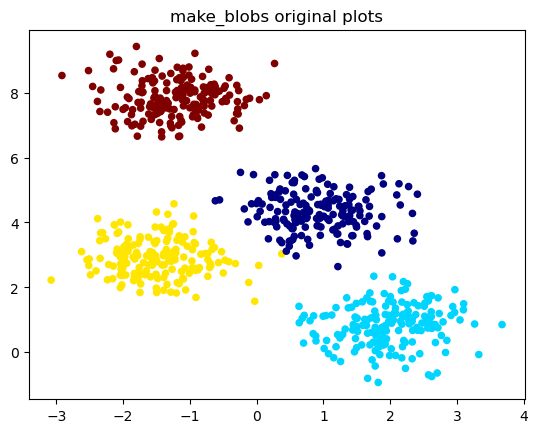

In [3]:
# make_blobs clusters
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, s=20, cmap='jet')
plt.title('make_blobs original plots')
plt.show()


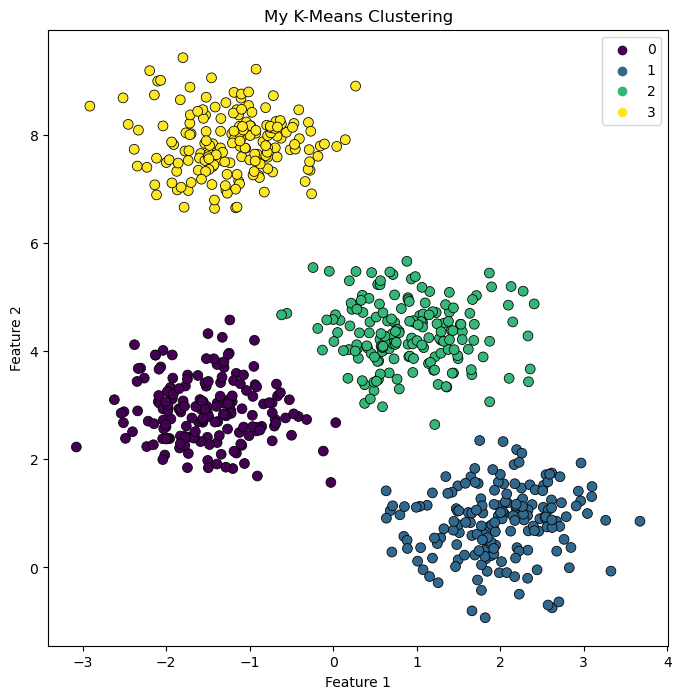

My centroids -  [[-1.4997094181421273, 2.905741940858994], [1.9877063026473267, 0.8318857877497889], [0.9004393234899267, 4.32217463716], [-1.2040579337244173, 7.837858432492295]]
0.9961850080391301


In [7]:
#1. My implementation
# %run k_means.py
from k_means import MyCluster

from sklearn.metrics.cluster import adjusted_rand_score


c = MyCluster(num_clusters=4)
labels, centroids = c.fit(X)

plt.figure(figsize=(8, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', edgecolor='k', s=50)
plt.title('My K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

score = adjusted_rand_score(cluster_assignments, labels)
print("My centroids - ", centroids)
print(score)

# 0.996 is the score 
# Hypothesis correct



## Now with scikit learn


/Users/ashu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


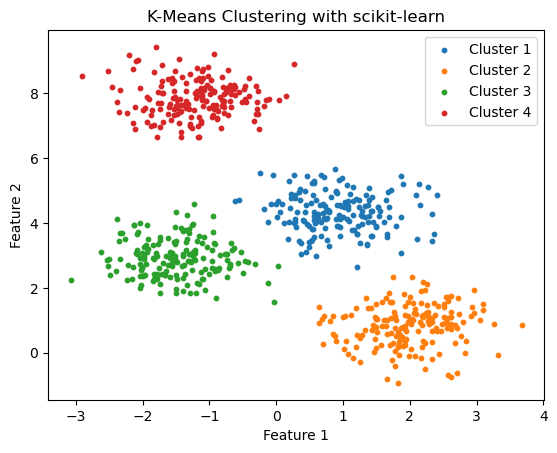

0.9961850080391301


In [11]:

#2.Scikit implementation
from sklearn.cluster import KMeans

np.random.seed(42)
X, cluster_assignments = make_blobs(n_samples=700, centers=4,cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=4)


kmeans.fit(X)

labels = kmeans.predict(X)

for i in range(4):  # Assuming 4 clusters
    cluster_points = X[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=10, label=f'Cluster {i + 1}')

plt.title('K-Means Clustering with scikit-learn')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

score = adjusted_rand_score(cluster_assignments, labels)
print(score)

# 0.996 is the score 
# Hypothesis correct.





In [5]:

#3.

## Comparison 
### On comparing the all the hypoothesis, we can see that the there are very few data points which are different in both the hypothesis. Its almost same.  The V measure score is coming out to be 0.996 which is very close and same for both the hypothesis.

<hr>

# Q. Choose and run clustering algorithms

### MOPSI DATA below




EDA

- Its is the dataset of longitude and latitudes. 
- latitude is parsed to float64 from string object.
- The columns are \t seperated.
- The values for longitude and latitude are multiplied by 10000. We will be scaling it ffor our analysis for DBSCAN
- THere are no null values found in df.info()


In [6]:
# 1. The reason why you chose the clustering algorithm(s)
## Ans - I chose K-MEANS & DBSCAN clustering algorithm because it was more relevent and appropriate because of its density evaluation.

# 2. Any pre-processing of the data or any hyperparameter settings
## Ans - Null values were dropped as a part of preprocessing. Also the data type of Latitude was set from object to float. Scaling was also done/
# For DBSCAN, we scaled the lat long values.

# 3. Output from the algorithm(s) -- show what clusters were generated
## Ans - we put k= 5, based on the elbow test. We see 5 clusters which correspond to population density.

# 4. The metrics you used to evaluate the output. What kind of performance did you get from that algorithm? Is that what you expected?
## Ans - If the silhouette score is close to 1, it suggests that the clusters are well-separated and each data point is assigned to the correct cluster.
### My k_means silhouette score is 0.79 which is a good score. The algorithm performed well as expected. We can notice how the points on the right side are cloured seperately.
### My dbscan silhouette score is 0.86 which is also a good score. The algorithm performed well more than expected. We can notice how the points on the right side are cloured seperately.



##### K-Means Clustering



In [53]:
import pandas as pd

df = pd.read_csv("mopsi.txt", sep='\t', header=None, names=['Latitude', 'Longitude'])
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')

df.dropna(inplace=True)



In [50]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13466 entries, 0 to 13466
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   13466 non-null  float64
 1   Longitude  13466 non-null  float64
dtypes: float64(2)
memory usage: 315.6 KB


,Latitude,Longitude
count,13466.000000,13466.000000
mean,625094.723377,289003.996955
std,7844.620431,20400.036704
min,599247.000000,212016.000000
25%,625930.000000,296160.000000
50%,626018.000000,297448.000000
75%,626192.000000,297796.000000
max,697835.000000,314328.000000


/Users/ashu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ashu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ashu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ashu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

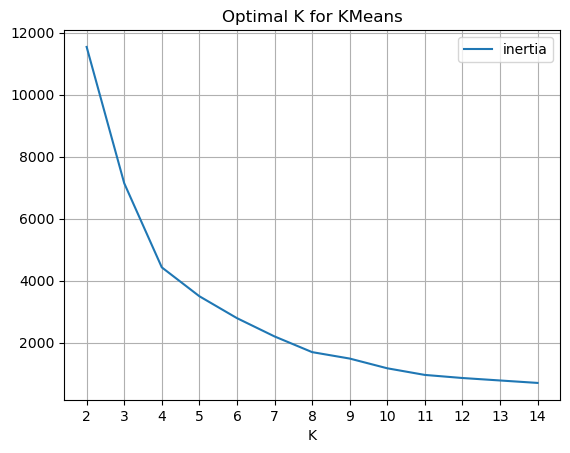

In [32]:
inertias = pd.DataFrame(data=[], index=range(2, 20), columns=['inertia'])

ss = StandardScaler()
df_scaled = ss.fit_transform(df)

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    inertias.loc[k] = kmeans.inertia_

kmeans = KMeans(n_clusters=7)

inertias.plot()
plt.xticks(range(2, 15))
plt.grid(True)
plt.title('Optimal K for KMeans')
plt.xlabel('K')
plt.show()


/Users/ashu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/kw/8ky0k5bn6fb4vnng1jc47rrh0000gn/T/ipykernel_12035/601005861.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Latitude', y='Longitude', c=kmeans.labels_, palette='plasma', marker='.')


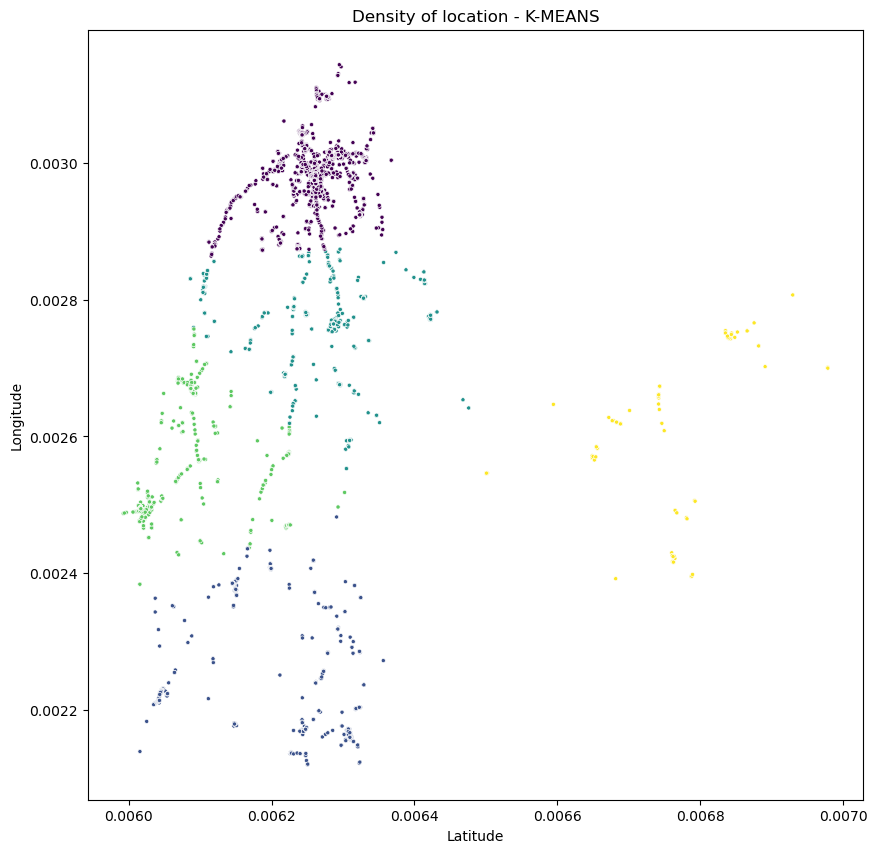

Silhouette Score: 0.796651764750759


In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df['Latitude'] = df['Latitude']/10000
df['Longitude'] = df['Longitude']/10000

df = df.dropna()

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Latitude', 'Longitude']])

plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='Latitude', y='Longitude', c=kmeans.labels_, palette='plasma', marker='.')
plt.title('Density of location - K-MEANS')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(df[['Latitude', 'Longitude']], df['Cluster'])
print("Silhouette Score:", silhouette_avg)



### DBSCAN below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13467 entries, 0 to 13466
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   13466 non-null  float64
 1   Longitude  13466 non-null  float64
dtypes: float64(2)
memory usage: 210.6 KB
Scikit-learn DBSCAN:  0.8637184247836516


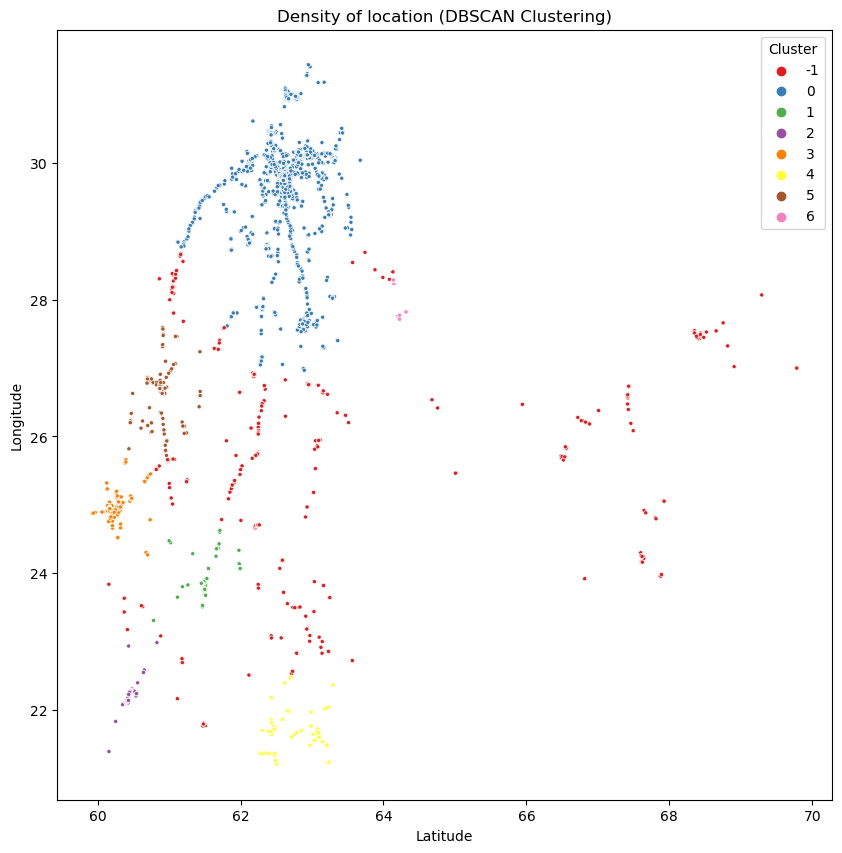

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

df = pd.read_csv("mopsi.txt", sep='\t', header=None, names=['Latitude', 'Longitude'])
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')

df['Latitude'] = df['Latitude']/10000
df['Longitude'] = df['Longitude']/10000

df.info()
df = df.dropna()



dbscan = DBSCAN(eps=0.5, min_samples=100)
df['Cluster'] = dbscan.fit_predict(df[['Latitude', 'Longitude']])



df['Cluster'] = dbscan.fit_predict(df[['Latitude', 'Longitude']])

plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='Latitude', y='Longitude', hue='Cluster', palette='Set1', marker='.')
plt.title('Density of location (DBSCAN Clustering)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
# plt.show()


sklearn_silhouette = silhouette_score(df, df['Cluster'])
print("Scikit-learn DBSCAN: ", sklearn_silhouette)




<hr>

## Chicago Taxi trips Data set below





EDA
### I will be doing the analysis with pickup and drop off poinjts with K-means as well as DBSCAN seperatrely.
### There are some missing values in the dataset. I will be dropping the missing values and then proceed with the analysis.
### I will be using the elbow method to find the optimal number of clusters for K-means and then proceed with the analysis.
### There are 95657 rows for pickup and 92489 for dropoff.

In [18]:
# 1. The reason why you chose the clustering algorithm(s)
## Ans - I chose K-MEANS & DBSCAN clustering algorithm because it was more relevent and appropriate because of its density evaluation.
    #    I didnt choose hierarchical because of the data representation limitation.

# 2. Any pre-processing of the data or any hyperparameter settings
## Ans - Removed the rows where the values were NULL
#      - Data was standardised using std scaler
#      - elbow test


# 3. Output from the algorithm(s) -- show what clusters were generated
## Ans - Using elbow method, then...
##  K-Means clustering algorithm show 5 clusters. The blue cluster shows the most dense area for pickups.
## That could be the downtown part of the city.The other 4 clusters represent the other areas of the city.

# 4. The metrics you used to evaluate the output. What kind of performance did you get from that algorithm? Is that what you expected?
### silhouette_score came out to be 0.669549722878715. The clusters seem pretty well.


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


df = pd.read_csv("Taxi_Trips__2013-2023_.csv")

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101788 entries, 0 to 101787
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Trip ID                     101788 non-null  object 
 1   Taxi ID                     101779 non-null  object 
 2   Trip Start Timestamp        101788 non-null  object 
 3   Trip End Timestamp          101788 non-null  object 
 4   Trip Seconds                101763 non-null  float64
 5   Trip Miles                  101788 non-null  float64
 6   Pickup Census Tract         35179 non-null   float64
 7   Dropoff Census Tract        35054 non-null   float64
 8   Pickup Community Area       95650 non-null   float64
 9   Dropoff Community Area      92192 non-null   float64
 10  Fare                        101681 non-null  float64
 11  Tips                        101681 non-null  float64
 12  Tolls                       101681 non-null  float64
 13  Extras        

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,101763.000000,101788.000000,3.517900e+04,3.505400e+04,95650.000000,92192.000000,101681.000000,101681.000000,101681.000000,101681.000000,101681.000000,95657.000000,95657.000000,92489.000000,92489.000000
mean,1102.644891,6.021135,1.703149e+10,1.703140e+10,33.230946,25.300764,20.466054,2.452347,0.014503,1.679117,24.739358,41.898703,-87.689956,41.892116,-87.657546
std,1831.031101,7.572349,3.696445e+05,3.377955e+05,25.309183,20.270499,18.103452,3.918353,0.602782,5.208910,22.641634,0.064621,0.104274,0.059306,0.063430
min,0.000000,0.000000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.660136,-87.913625,41.660136,-87.913625
25%,420.000000,0.870000,1.703108e+10,1.703108e+10,8.000000,8.000000,7.750000,0.000000,0.000000,0.000000,9.500000,41.878866,-87.695013,41.878866,-87.663518
50%,836.000000,2.600000,1.703132e+10,1.703132e+10,32.000000,28.000000,13.500000,0.000000,0.000000,0.000000,16.000000,41.895033,-87.642649,41.892508,-87.633308
75%,1516.000000,10.800000,1.703184e+10,1.703184e+10,50.000000,32.000000,31.000000,3.000000,0.000000,1.000000,33.900000,41.949829,-87.626211,41.922686,-87.625192
max,86003.000000,814.300000,1.703198e+10,1.703198e+10,77.000000,77.000000,999.000000,250.000000,78.000000,182.000000,999.000000,42.015934,-87.534903,42.021224,-87.534903


/Users/ashu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ashu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ashu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ashu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

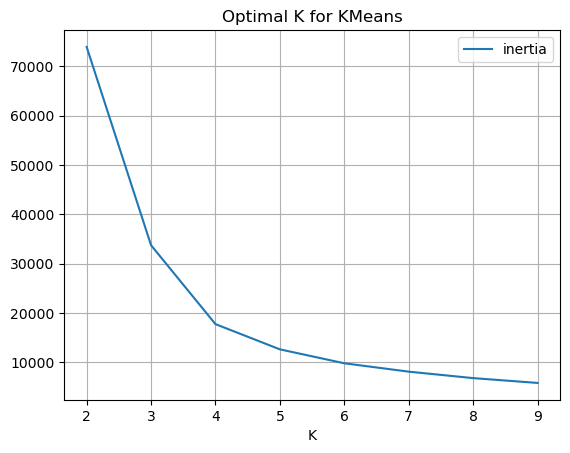

/Users/ashu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


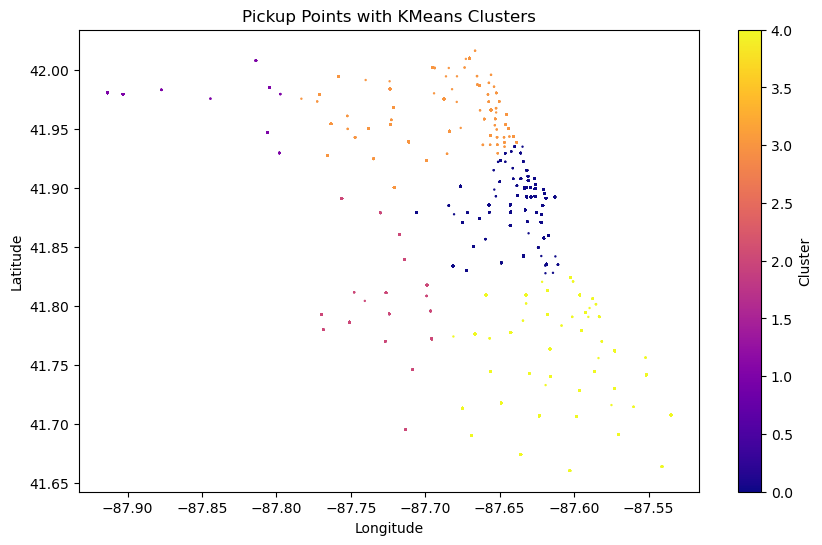

Number of clusters: 5
0    54868
1    16420
3    12455
4     8018
2     3896
Name: Cluster, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 95657 entries, 0 to 101786
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Pickup Centroid Latitude   95657 non-null  float64
 1   Pickup Centroid Longitude  95657 non-null  float64
 2   Cluster                    95657 non-null  int32  
dtypes: float64(2), int32(1)
memory usage: 2.6 MB


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv("Taxi_Trips__2013-2023_.csv")

##### FINDING THE MOST OPTIMAL NUMBER OF CLUSTERS FOR K-MEANS

location_data = df[['Pickup Centroid Latitude', 'Pickup Centroid Longitude']].dropna()
scaler = StandardScaler()
location_data_scaled = scaler.fit_transform(location_data)
inertias = pd.DataFrame(data=[], index=range(2, 20), columns=['inertia'])
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(location_data_scaled)
    inertias.loc[k] = kmeans.inertia_

inertias.plot()
plt.xticks(range(2, 10))
plt.grid(True)
plt.title('Optimal K for KMeans')
plt.xlabel('K')
plt.show()

# Elbow comes out to be between 3 and 6, so choosing 4.

#####

df_subset = df[["Pickup Centroid Latitude", "Pickup Centroid Longitude"]]
df_subset_cleaned = df_subset.dropna() # drop the null values

df_subset_cleaned = df_subset_cleaned.astype(float)

n_clusters = 5  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_subset_cleaned['Cluster'] = kmeans.fit_predict(df_subset_cleaned[['Pickup Centroid Latitude', 'Pickup Centroid Longitude']])

plt.figure(figsize=(10, 6))
plt.scatter(df_subset_cleaned["Pickup Centroid Longitude"], df_subset_cleaned["Pickup Centroid Latitude"], c=df_subset_cleaned['Cluster'], marker=".", cmap='plasma', s=2)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Pickup Points with KMeans Clusters')
plt.colorbar(label='Cluster')
plt.show()

print("Number of clusters:", n_clusters)
print(df_subset_cleaned['Cluster'].value_counts())

silhouette_avg = silhouette_score(df_subset_cleaned[['Pickup Centroid Latitude', 'Pickup Centroid Longitude']], df_subset_cleaned['Cluster'])
print("Silhouette Score:", silhouette_avg)

df_subset_cleaned.info()


/Users/ashu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ashu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ashu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ashu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

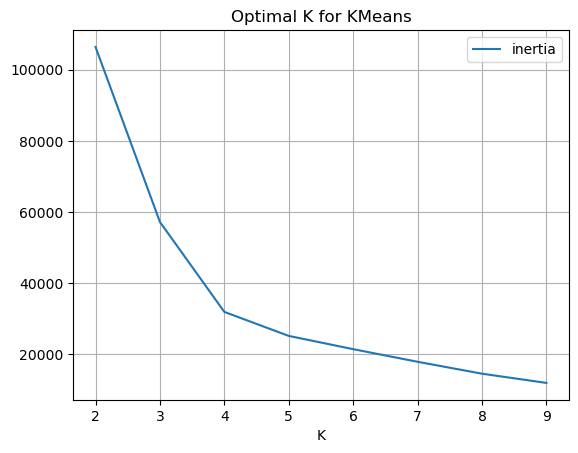

/Users/ashu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


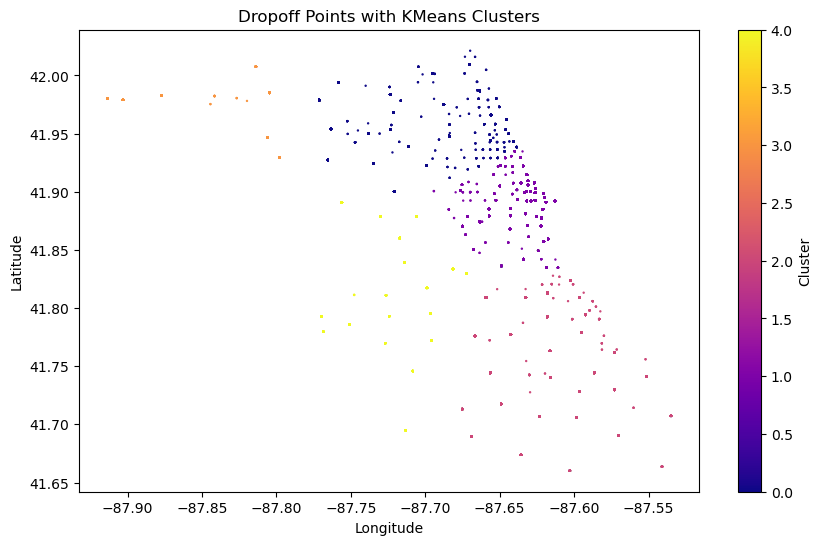

Number of clusters: 5
1    58997
0    17111
2     8990
3     4634
4     2757
Name: Cluster, dtype: int64
Silhouette Score: 0.6143439307280666
<class 'pandas.core.frame.DataFrame'>
Int64Index: 92489 entries, 1 to 101786
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Dropoff Centroid Latitude   92489 non-null  float64
 1   Dropoff Centroid Longitude  92489 non-null  float64
 2   Cluster                     92489 non-null  int32  
dtypes: float64(2), int32(1)
memory usage: 2.5 MB


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv("Taxi_Trips__2013-2023_.csv")


##### FINDING THE MOST OPTIMAL NUMBER OF CLUSTERS FOR K-MEANS

location_data = df[['Dropoff Centroid Latitude', 'Dropoff Centroid Longitude']].dropna()
scaler = StandardScaler()
location_data_scaled = scaler.fit_transform(location_data)
inertias = pd.DataFrame(data=[], index=range(2, 20), columns=['inertia'])
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(location_data_scaled)
    inertias.loc[k] = kmeans.inertia_

inertias.plot()
plt.xticks(range(2, 10))
plt.grid(True)
plt.title('Optimal K for KMeans')
plt.xlabel('K')
plt.show()

# Elbow comes out to be between 3 and 6, so choosing 4.

#####

df_subset = df[["Dropoff Centroid Latitude", "Dropoff Centroid Longitude"]]
df_subset_cleaned = df_subset.dropna() # drop the null values

df_subset_cleaned = df_subset_cleaned.astype(float)

n_clusters = 5  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_subset_cleaned['Cluster'] = kmeans.fit_predict(df_subset_cleaned[['Dropoff Centroid Latitude', 'Dropoff Centroid Longitude']])

plt.figure(figsize=(10, 6))
plt.scatter(df_subset_cleaned["Dropoff Centroid Longitude"], df_subset_cleaned["Dropoff Centroid Latitude"], c=df_subset_cleaned['Cluster'], marker=".", cmap='plasma', s=2)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Dropoff Points with KMeans Clusters')
plt.colorbar(label='Cluster')
plt.show()

print("Number of clusters:", n_clusters)
print(df_subset_cleaned['Cluster'].value_counts())

silhouette_avg = silhouette_score(df_subset_cleaned[['Dropoff Centroid Latitude', 'Dropoff Centroid Longitude']], df_subset_cleaned['Cluster'])
print("Silhouette Score:", silhouette_avg)

df_subset_cleaned.info()


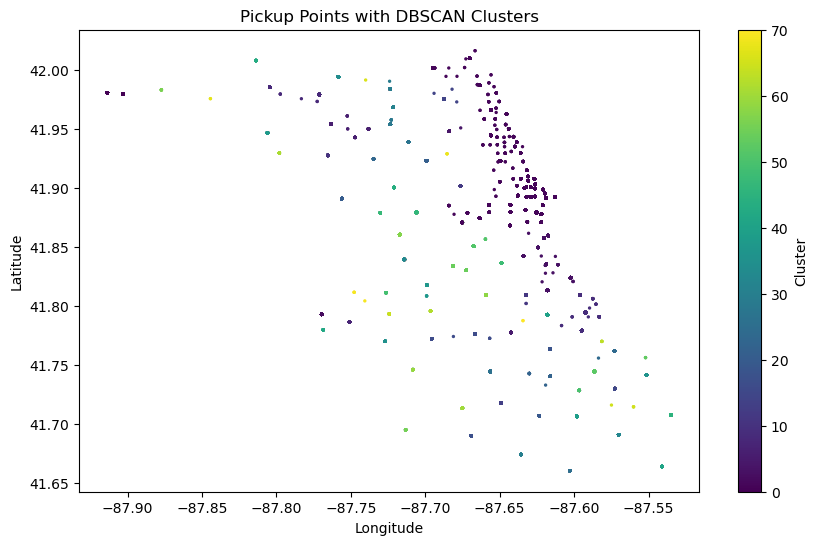

Number of clusters: 71
1     58926
0     15998
3      4097
2      1860
9      1668
      ...  
68        3
53        3
67        2
70        2
66        1
Name: Cluster, Length: 71, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 95657 entries, 0 to 101786
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Pickup Centroid Latitude   95657 non-null  float64
 1   Pickup Centroid Longitude  95657 non-null  float64
 2   Cluster                    95657 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 MB


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Taxi_Trips__2013-2023_.csv")

df_subset = df[["Pickup Centroid Latitude", "Pickup Centroid Longitude"]]
df_subset_cleaned = df_subset.dropna()

df_subset_cleaned = df_subset_cleaned.astype(float)

scaler = StandardScaler()
df_subset_scaled = scaler.fit_transform(df_subset_cleaned)

eps = 0.15  
min_samples =   1
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df_subset_cleaned['Cluster'] = dbscan.fit_predict(df_subset_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(df_subset_cleaned["Pickup Centroid Longitude"], df_subset_cleaned["Pickup Centroid Latitude"], c=df_subset_cleaned['Cluster'], cmap='viridis', s=2)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Pickup Points with DBSCAN Clusters')
plt.colorbar(label='Cluster')
plt.show()

unique_clusters = df_subset_cleaned['Cluster'].unique()
num_clusters = len(unique_clusters) - 1 if -1 in unique_clusters else len(unique_clusters)
print("Number of clusters:", num_clusters)
print(df_subset_cleaned['Cluster'].value_counts())

df_subset_cleaned.info()



## above mentioned DBSCAN above for pickup points is not well defined.



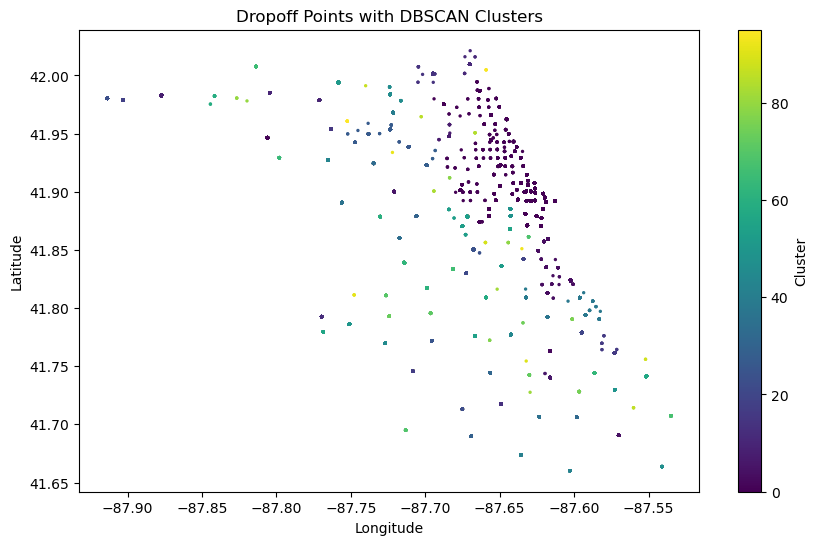

Number of clusters: 96
0     60377
3      4730
48     3452
18     2029
23     1651
      ...  
90        1
82        1
92        1
93        1
81        1
Name: Cluster, Length: 96, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 92489 entries, 1 to 101786
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Dropoff Centroid Latitude   92489 non-null  float64
 1   Dropoff Centroid Longitude  92489 non-null  float64
 2   Cluster                     92489 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 2.8 MB


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Taxi_Trips__2013-2023_.csv")

df_subset = df[["Dropoff Centroid Latitude", "Dropoff Centroid Longitude"]]
df_subset_cleaned = df_subset.dropna()

df_subset_cleaned = df_subset_cleaned.astype(float)

scaler = StandardScaler()
df_subset_scaled = scaler.fit_transform(df_subset_cleaned)

eps = 0.15  
min_samples = 1 
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df_subset_cleaned['Cluster'] = dbscan.fit_predict(df_subset_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(df_subset_cleaned["Dropoff Centroid Longitude"], df_subset_cleaned["Dropoff Centroid Latitude"], c=df_subset_cleaned['Cluster'], cmap='viridis', s=2)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Dropoff Points with DBSCAN Clusters')
plt.colorbar(label='Cluster')
plt.show()

unique_clusters = df_subset_cleaned['Cluster'].unique()
num_clusters = len(unique_clusters) - 1 if -1 in unique_clusters else len(unique_clusters)
print("Number of clusters:", num_clusters)
print(df_subset_cleaned['Cluster'].value_counts())

df_subset_cleaned.info()


## Analysis output - above shown DBSCAN above for dropoff points is not well defined.


<hr>


# EXTENDED K-MEANS below

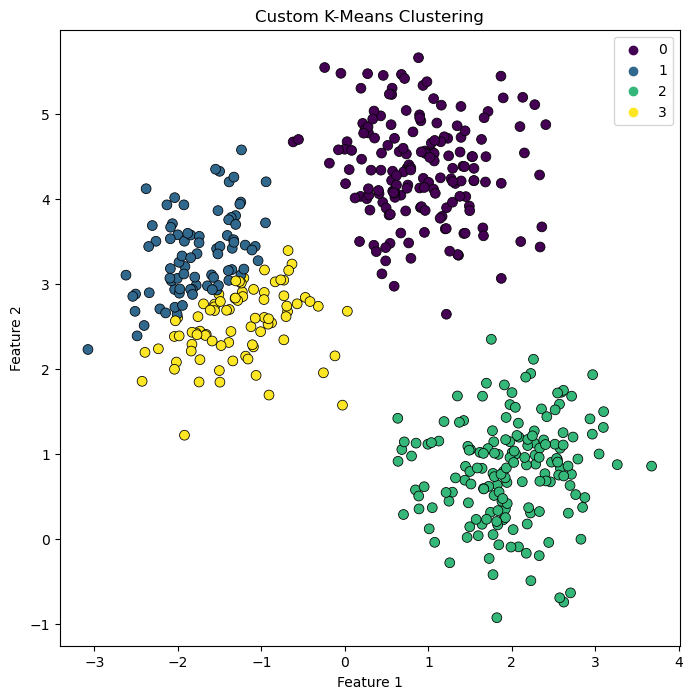

Counter({0: 167, 2: 167, 1: 83, 3: 83})
Adjusted Rand Score: 0.8700639973950179


In [16]:

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.datasets import make_blobs
from collections import Counter
%run k_means.py
import matplotlib.pyplot as plt
import seaborn as sns


X, cluster_assignments = make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=0)

c = MyCluster(num_clusters=4, balanced=False)  # Regular K-MEANS
labels, centroids = c.fit(X)

plt.figure(figsize=(8, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', edgecolor='k', s=50)
plt.title('Custom K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

print(Counter(labels))

score = adjusted_rand_score(cluster_assignments, labels)
print("Adjusted Rand Score:", score)


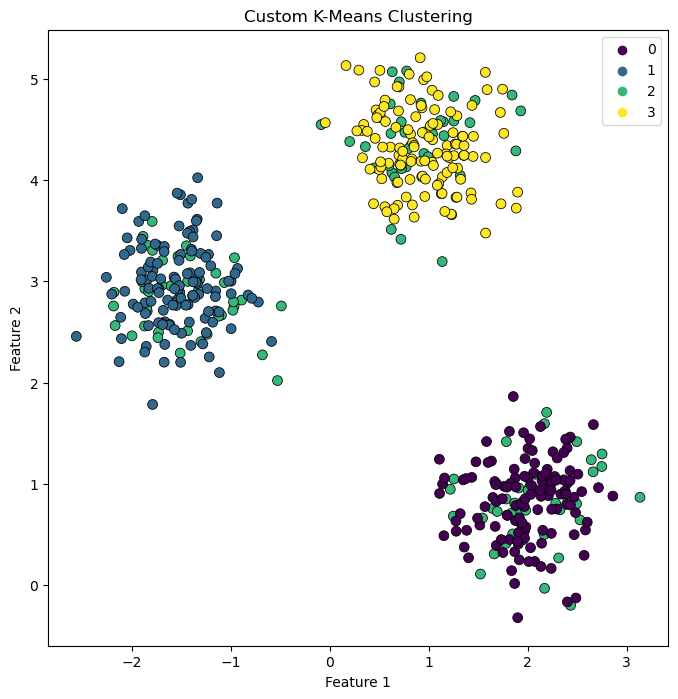

Counter({2: 125, 3: 125, 1: 125, 0: 125})
Adjusted Rand Score: 0.5980745856886539


In [34]:

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.datasets import make_blobs
from collections import Counter
%run k_means.py
import matplotlib.pyplot as plt
import seaborn as sns


X, cluster_assignments = make_blobs(n_samples=500, centers=3, cluster_std=0.40, random_state=0)

c = MyCluster(num_clusters=4, balanced=True) # BALANCED K-MEANS
labels, centroids = c.fit(X)

plt.figure(figsize=(8, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', edgecolor='k', s=50)
plt.title('Custom K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

print(Counter(labels))

score = adjusted_rand_score(cluster_assignments, labels)
print("Adjusted Rand Score:", score)
